# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [383]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import os
import io
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [384]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [385]:
len(twitter_archive['tweet_id'])

2356

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [386]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [387]:
with open(url.split('/')[-1], 'wb') as image:
    image.write(response.content)

In [388]:
image_predictions = pd.read_csv(url.split('/')[-1], sep= '\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [389]:
tweets = []
with open('tweet-json copy') as file:
    for line in file:
        I = json.loads(line)
        tweets.append({'tweet_id': I['id'],
                      'retweet_count': I['retweet_count'],
                      'favorite_count': I['favorite_count']})
    

In [390]:
tweet_df = pd.DataFrame(tweets)
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data




## Visual Assessment

In [391]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [392]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [393]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Programatic Assesment

In [394]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [395]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [396]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Dallas       1
Chubbs       1
Miguel       1
Ginger       1
Josep        1
Name: name, Length: 957, dtype: int64

In [397]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [398]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [399]:
twitter_archive.duplicated().sum()

0

In [400]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [401]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [402]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [403]:
sum(image_predictions.duplicated())

0

In [404]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [405]:
image_predictions.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
Name: jpg_url, dtype: int64

we can see some of these dog images are duplicates which means it contains retweets

going ahead to check for predictions that are not dogs

In [406]:
image_predictions.query("p1_dog == False and p2_dog == False and p3_dog == False")


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [407]:
image_predictions.query("p1_dog == False and (p2_dog == True or p3_dog == True)")


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True


we can see some of the first predictions that were not dogs, were predicted to be be dogs in the second and third predictions which means the dogs are in the background or there are no dogs in the pictures

In [408]:
# Checking for duplicated columns by creating a list of every column in every dataset
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_df))
# all_columns
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [409]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [410]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [411]:
tweet_df.duplicated().sum()

0

### Quality issues
1. There are too much outliers in rating_numerator and rating_denominator

2. some of the dog names are missing and incorrect in the twitter archive data

3. some columns in the twitter archive data have more null values such as - in_reply_to_status, in_reply_to_user_id,    retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

4. timestamp column in twitter archive data is not in datatime format.

5. There were 2075 rows in the image predictions compared to 2356 rows in the twitter archive.

6. The source column has Html tags which makes it hard to read.

7. the data contains retweets

8. the tweet_id is in integer datatype, it should be a string

9. Inaccurate values in the rating_numerator and rating_denominator columns in the twitter archive table

### Tidiness issues
1. Four columns for stages of dog (doggo, pupper, puppo, floofer) should be one category column in the twitter archive table

2. Predictions, Confidence and dog test are spread in three columns each.

3. All three tables share the column tweet_id and should be merged together.

 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 



In [412]:
# Make copies of original pieces of data
twitter_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweetcount_clean = tweet_df.copy()

### Issue #1: Twitter archive table

#### Define: remove columns with null values and unused columns such as retweeted columns

### Code

In [413]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

first I delete all rows that have retweet_status_id before dropping the columns

In [414]:
twitter_clean.drop(twitter_clean[twitter_clean['retweeted_status_id'].notna()].index, inplace= True)

In [415]:
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1, inplace= True)        

#### Test

In [416]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define : change the datatype of tweet_id from int to str, the timestamp from str to datetime, source from str to category

#### Code

In [417]:
# Convert tweet_id to str from twitter_archive, image_prediction, tweet_df tables.
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweetcount_clean.tweet_id = tweetcount_clean.tweet_id.astype(str)

# convert timestamp to datetime
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

# convert source to category datatype
twitter_clean.source = twitter_clean.source.astype('category')

### Test

In [418]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Define - Create a new column named doy_type with doggo, floofer, pupper, puppo as its values; extracted from the text column and drop the doggo, floofer, pupper, puppo columns. Also, change the datatype of the new column created to category.



#### Code

In [419]:
# Check the values in those columns by excuting those columns
print(twitter_clean.doggo.value_counts())
print(twitter_clean.floofer.value_counts())
print(twitter_clean.pupper.value_counts())
print(twitter_clean.puppo.value_counts())

None     2088
doggo      87
Name: doggo, dtype: int64
None       2165
floofer      10
Name: floofer, dtype: int64
None      1941
pupper     234
Name: pupper, dtype: int64
None     2150
puppo      25
Name: puppo, dtype: int64


In [420]:
#replace the none in the columns with " "
for x in ['doggo', 'floofer', 'pupper', 'puppo']:
    twitter_clean[x].replace('None', ' ', inplace = True)

In [421]:
#create new column for dog type in twitter_clean
twitter_clean['dog_type'] = twitter_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)
#remove whitespaces
twitter_clean.dog_type = twitter_clean.dog_type.str.strip()



In [422]:
#dropping the columns
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace= True)
#changing the datatype of dog_type to category
twitter_clean.dog_type = twitter_clean.dog_type.astype('category')


#### Test

In [423]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [424]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dog_type            240 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 140.6+ KB


In [425]:
twitter_clean.dog_type.value_counts()

pupper     152
doggo       55
puppo       30
floofer      3
Name: dog_type, dtype: int64

### Define - remove HTML tags in source column

#### Clean 

In [426]:
twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [427]:
# extracting from the source column
twitter_clean.source = twitter_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test 

In [428]:
twitter_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [429]:
# convert source to category datatype
twitter_clean.source = twitter_clean.source.astype('category')

#### Define -  replace the 'None' and 'a' in the name column by NaN values. Many dog names are wrong and are just other words in English

#### Code

In [430]:
twitter_clean.name.value_counts()

None       680
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Mojo         1
Dook         1
Danny        1
Travis       1
Josep        1
Name: name, Length: 956, dtype: int64

In [431]:
#check names that are not dog names
twitter_clean[twitter_clean.name.str.lower() == twitter_clean.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [432]:
#replace incorrect name with NaN
twitter_clean['name'] = twitter_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [433]:
twitter_clean.name = twitter_clean.name.replace('None', np.nan)

#### test

In [434]:
twitter_clean[twitter_clean.name.str.lower() == twitter_clean.name].name.unique()

array([], dtype=object)

In [435]:
twitter_clean.name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
           ..
Dook        1
Danny       1
Travis      1
Damon       1
Josep       1
Name: name, Length: 930, dtype: int64

In [436]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1391 non-null   object             
 8   dog_type            240 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 140.6+ KB


#### Define - correct the wrong values for the ratings numerator and ratings denominator

#### Code

In [437]:
twitter_clean.rating_numerator.value_counts().sort_index()

0         2
1         8
2         9
3        19
4        17
5        36
6        32
7        54
8        98
9       156
10      442
11      426
12      500
13      307
14       43
15        1
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [438]:
twitter_clean.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2153
11        2
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [439]:
# use for loop to set rating_denominator rate to 10

for x in twitter_clean.rating_denominator:
    twitter_clean.rating_denominator=10.0

In [440]:
#test total rating_denominator which still has value more than 10
sum(twitter_clean.rating_denominator>10)

0

In [441]:
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype('float')

In [442]:
# View all occurences where there are more than one #/# in 'text' column
text_ratings = twitter_clean[twitter_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings

55      @roushfenway These are good dogs but 17/10 is ...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
766     "Yep... just as I suspected. You're not flossi...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1832    These two pups just met and have instantly bon...
1897    Meet R

In [443]:
for entry in text_ratings:
    mask = twitter_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_clean.loc[mask, column_name2] = 10

In [444]:
twitter_clean[twitter_clean.text.isin(text_ratings)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
55,881633300179243008,2017-07-02 21:58:53+00:00,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,NaN,13,10.0,NaN,NaN
313,835246439529840640,2017-02-24 21:54:03+00:00,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10.0,NaN,NaN
766,777684233540206592,2016-09-19 01:42:24+00:00,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11,10.0,NaN,NaN
1007,747600769478692864,2016-06-28 01:21:27+00:00,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7,10.0,Bookstore,NaN
1068,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10.0,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10.0,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10.0,Bluebert,NaN
1222,714258258790387713,2016-03-28 01:10:13+00:00,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10.0,Travis,NaN
1359,703356393781329922,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10.0,Socks,NaN
1459,695064344191721472,2016-02-04 02:00:27+00:00,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10.0,NaN,NaN


In [445]:
# View tweets with decimals in rating in 'text' column
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10.0,Bella,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10.0,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10.0,Sophie,NaN
1689,681340665377193984,2015-12-28 05:07:27+00:00,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,5,10.0,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10.0,NaN,NaN


In [446]:
#using regex to extract the rating_numerator from the texts
twitter_clean['rating_numerator'] = twitter_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]


#### Test

In [447]:
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,NaN
1689,681340665377193984,2015-12-28 05:07:27+00:00,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,9.5,10.0,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,NaN,NaN


In [448]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   object             
 6   rating_denominator  2175 non-null   float64            
 7   name                1391 non-null   object             
 8   dog_type            240 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 140.6+ KB


In [449]:
twitter_clean.rating_denominator.value_counts()

10.0    2175
Name: rating_denominator, dtype: int64

### Image Prediction table

#### Define - Drop rows where all predictions of dog breed is not a dog

#### Code

In [450]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [451]:
# keep rows with at least one dog prediction
image_clean = image_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

#### Test

In [452]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


#### Define - Replace the underscores in the p1, p2 and p3 columns by spaces.

#### Code

In [453]:
#replacing using the replace function
image_clean.p1 = image_clean.p1.str.replace('_',' ')
image_clean.p2 = image_clean.p2.str.replace('_',' ')
image_clean.p3 = image_clean.p3.str.replace('_',' ')

####  Test

In [454]:
image_clean.head(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define - Melt The different predictions, the confidence and dog test into four columns: prediction_number, prediction, confidence and dog

#### Code

In [455]:
# create 'prediction_number' and 'dog_breeds' columns
image_clean = pd.melt(image_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog',
       'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
               var_name = 'prediction_number',
               value_name = 'prediction')

# create 'confidence' column
image_clean = pd.melt(image_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_dog',
       'p2_dog', 'p3_dog', 'prediction_number', 'prediction'],
               var_name = 'to_delete',
               value_name = 'confidence')



In [456]:
# remove newly created duplicated rows
image_clean = image_clean[image_clean['prediction_number'] == image_clean['to_delete'].str[:2]]
# remove unnecesary column
image_clean = image_clean.drop('to_delete', axis=1)

# create 'dog' column
image_clean = pd.melt(image_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num','prediction_number', 'prediction', 'confidence'],
               var_name = 'to_delete2',
               value_name = 'dog')

In [457]:
# remove newly created duplicated rows
image_clean = image_clean[image_clean['prediction_number'] == image_clean['to_delete2'].str[:2]]

# remove unnecesary column
image_clean = image_clean.drop('to_delete2', axis=1)
# remove 'p' from prediction number
image_clean['prediction_number'] = image_clean['prediction_number'].str[1]

In [458]:
image_clean = image_clean.drop('img_num', axis=1)


#### Test

In [459]:
image_clean.sort_values(by = ['tweet_id', 'prediction_number']).head(10)

,tweet_id,jpg_url,prediction_number,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True
7004,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,2,collie,0.156665,True
14008,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,3,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
7005,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,2,miniature pinscher,0.074192,True
14009,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,3,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True
7006,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,2,malinois,0.138584,True
14010,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,3,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True


In [460]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5253 entries, 0 to 15758
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           5253 non-null   object 
 1   jpg_url            5253 non-null   object 
 2   prediction_number  5253 non-null   object 
 3   prediction         5253 non-null   object 
 4   confidence         5253 non-null   float64
 5   dog                5253 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 251.4+ KB


#### Define - Merge the tweetcount table and the image clean table to twitter clean table 

#### Code

In [461]:
twitter_clean = pd.merge(twitter_clean, tweetcount_clean, on= 'tweet_id', how= 'inner')

In [462]:
master_df = pd.merge(twitter_clean, image_clean, on= 'tweet_id', how= 'inner')

In [463]:
master_df[master_df.duplicated(['tweet_id'])]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,prediction_number,prediction,confidence,dog
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2,Pekinese,0.090647,True
2,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,3,papillon,0.068957,True
4,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2,malamute,0.078253,True
5,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3,kelpie,0.031379,True
7,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2,Labrador retriever,0.168086,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,NaN,NaN,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,3,bloodhound,0.116197,True
5053,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,2,miniature pinscher,0.074192,True
5054,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,3,Rhodesian ridgeback,0.072010,True
5056,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10.0,NaN,NaN,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,2,collie,0.156665,True


In [464]:
master_df = master_df.drop_duplicates(['tweet_id'])

In [465]:
master_df.reset_index(drop= True, inplace= True)

#### Test 

In [466]:
master_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,prediction_number,prediction,confidence,dog
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1,basset,0.555712,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay retriever,0.425595,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True
1682,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True
1683,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,NaN,NaN,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True
1684,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


In [478]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   category           
 3   text                1686 non-null   object             
 4   expanded_urls       1686 non-null   object             
 5   rating_numerator    1686 non-null   object             
 6   rating_denominator  1686 non-null   float64            
 7   name                1187 non-null   object             
 8   dog_type            191 non-null    category           
 9   retweet_count       1686 non-null   int64              
 10  favorite_count      1686 non-null   int64              
 11  jpg_url             1686 non-null   object             
 12  prediction_number   1686 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [479]:
master_df_clean = master_df.copy()

In [480]:
master_df_clean.to_csv('twitter_archive_master.csv', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [481]:
import seaborn as sns

In [488]:
#reading the cleaned twitter archives csv file for analysis
twitter_master = pd.read_csv('twitter_archive_master.csv',  sep=',')

In [489]:
twitter_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,prediction_number,prediction,confidence,dog
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1,basset,0.555712,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay retriever,0.425595,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True
1682,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True
1683,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True
1684,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


In [496]:
# Convert columns to their appropriate types
twitter_master['tweet_id'] = twitter_master['tweet_id'].astype(object)
twitter_master['timestamp'] = pd.to_datetime(twitter_master.timestamp)
twitter_master['source'] = twitter_master['source'].astype('category')

In [497]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   category           
 3   text                1686 non-null   object             
 4   expanded_urls       1686 non-null   object             
 5   rating_numerator    1686 non-null   float64            
 6   rating_denominator  1686 non-null   float64            
 7   name                1187 non-null   object             
 8   dog_type            191 non-null    object             
 9   retweet_count       1686 non-null   int64              
 10  favorite_count      1686 non-null   int64              
 11  jpg_url             1686 non-null   object             
 12  prediction_number   1686 non-null 

### Dog  type with the Highest tweets

In [498]:
twitter_master.dog_type.value_counts()

pupper     123
doggo       40
puppo       26
floofer      2
Name: dog_type, dtype: int64

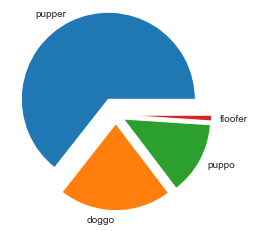

In [511]:
types = twitter_master.dog_type.value_counts()
type_labels = twitter_master['dog_type'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1)                               
plt.pie(types, explode= explode, labels = type_labels)
plt.show()


In [500]:
twitter_master[twitter_master['dog_type'] != 'None'].groupby('dog_type')['rating_numerator'].mean()


dog_type
doggo      11.700000
floofer    12.500000
pupper     10.894309
puppo      12.076923
Name: rating_numerator, dtype: float64

#### Analyses
As we can see that pupper had the highest number of dogs but had a lower rating. doggo has the highest ratings.

### The most used Source for twitter

In [507]:
tweet_source = twitter_master.source.value_counts()
tweet_source

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

#### Analyses
the highest source of tweets was from twitter for iphone followed by web

### Highest Average rated predicted dog_breed

In [529]:
#using groupby to group the predicted dog_breeds and getting the mean
avg_ratings = twitter_master.groupby('prediction')['rating_numerator'].mean().sort_values(ascending= False).head(5)
avg_ratings


prediction
soft-coated wheaten terrier    25.454545
teddy                          22.166667
West Highland white terrier    15.642857
Great Pyrenees                 14.928571
borzoi                         14.444444
Name: rating_numerator, dtype: float64

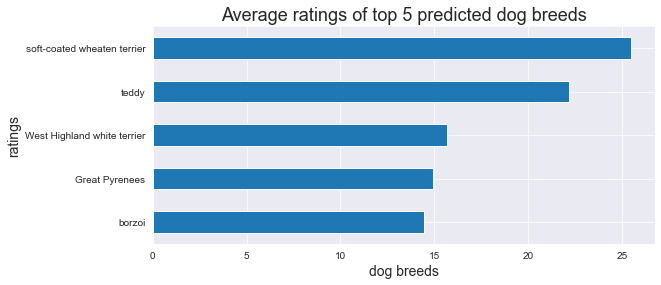

In [537]:
sns.set_style('darkgrid')
avg_ratings.sort_values(ascending= True).plot(kind= 'barh', figsize= (9, 4))
plt.title('Average ratings of top 5 predicted dog breeds', fontsize= 18)
plt.xlabel('dog breeds', fontsize= 14)
plt.ylabel('ratings', fontsize= 14)
plt.show()

#### Analyses
this shows the top 5 highest average ratings for the predicted dog breeds and we can see that the soft-coated wheaten terrier had the highest ratings 

### Correlation between Favourites, Retweets and rating numerator

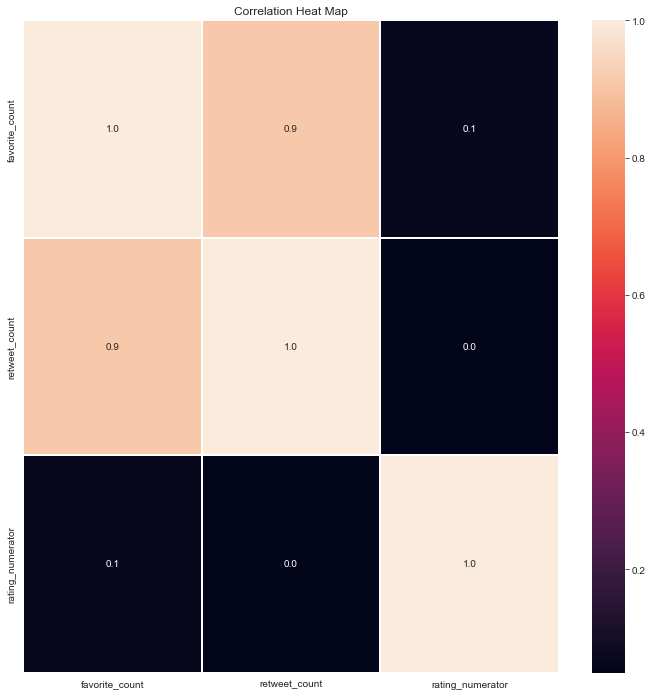

In [543]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(twitter_master[['favorite_count','retweet_count','rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map');

#### Analyses
 Strong correlation between favorite_count and retweet_count
 
 No correlation between user ratings and retweet_count and favourite_count

### Insights:
1. pupper had the highest number of dogs but had a lower rating

2. the analyses shows a strong correlation between retweets and favourites counts

3. thesoft-coated wheaten terrier had the highest average ratings

### Visualization

### Scatter plot between favorite_count and retweet_count

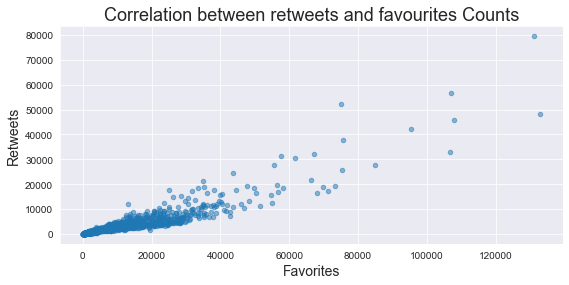

In [544]:
twitter_master.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5, figsize= (9, 4))
plt.xlabel('Favorites', fontsize= 14)
plt.ylabel('Retweets', fontsize= 14)
plt.title('Correlation between retweets and favourites Counts', fontsize= 18);

As we can see as this futher and clearly shows that there is a positive correlation between retweets and favourites as earlier shown in the heatmap above.